# Regrecion lineal : costo de un incidente de seguridad

 En este ejercisio se explican los fundamentos de la regrecion lineal a un caso sencillo de relacionado con la Cyberseguridad



 el ejercisio consiste en predecir el costo de un incidente de seguridad en base al numero de equipos afectados . El conjunto de datos es generado de manera aletoria

In [2]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4+ 3 * X + np.random.randn(100, 1)
print("La Longitud del DataSet es" ,len(X))

La Longitud del DataSet es 100


## 2.- Visualizacion de dataSet

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

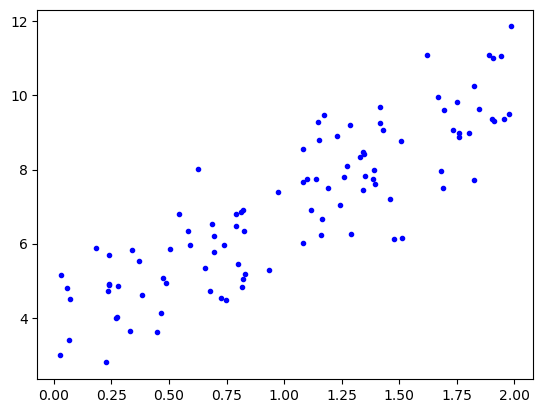

In [4]:
plt.plot(X, y, "b.")
plt.show()

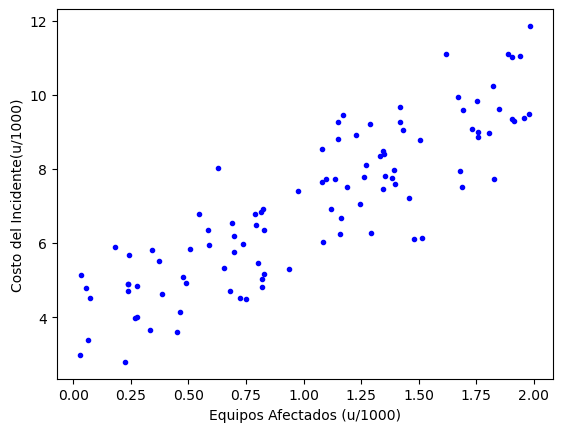

In [5]:
plt.plot(X, y,"b.")
plt.xlabel("Equipos Afectados (u/1000)")
plt.ylabel("Costo del Incidente(u/1000)")
plt.show()

### 3.- Modificacion de DataSet

In [6]:
import pandas as pd 
data = {'No_Equipos_Afectados': X.flatten(), 'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,1.343779,7.448423
1,0.626401,8.026401
2,0.276831,4.855383
3,0.695585,5.763968
4,1.479604,6.123627
5,1.395717,7.603089
6,0.071914,4.507431
7,0.064528,3.394821
8,0.383680,4.626747
9,1.392769,7.976538


In [7]:
# Escalando el numero de equipos afecctados 
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype(int)
# Escalado de Costo
df['Costo']=df['Costo'] * 10000
df['Costo']=df['Costo'].astype(int)
df.head(10)

,No_Equipos_Afectados,Costo
0,1343,74484
1,626,80264
2,276,48553
3,695,57639
4,1479,61236
5,1395,76030
6,71,45074
7,64,33948
8,383,46267
9,1392,79765


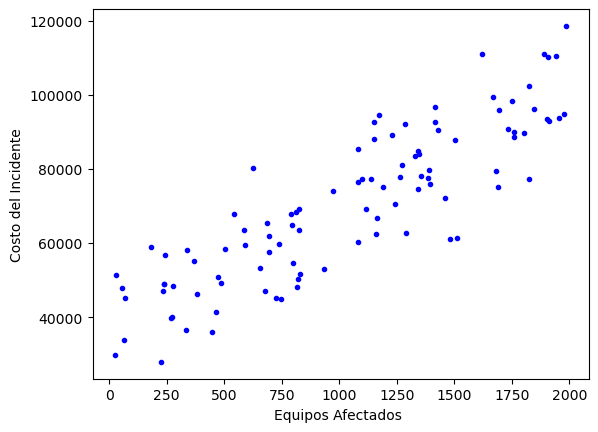

In [8]:
#Reprecentacion grafica de DataSet
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos Afectados ")
plt.ylabel("Costo del Incidente")
plt.show()


## 4.- Construccion del Modelo

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1, 1), df['Costo'].values)

LinearRegression()

In [11]:

lin_reg.intercept_

np.float64(37469.70345540185)

In [12]:
lin_reg.coef_

array([31.81199871])

In [13]:
# Prediccion para el valor minimo yb maximo de DataSet en entrenamiento
X_min_max = np.array([[df["No_Equipos_Afectados"].min()],[df["No_Equipos_Afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

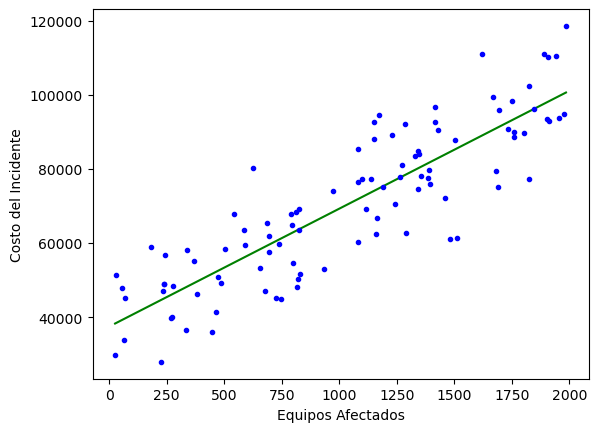

In [14]:
# Reprecentacion gráfica de la función de Hipotesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()

## 5.- Prediccion de nuevos ejemplos 

In [15]:
x_new = np.array([[3000]]) # 1500


Costo =lin_reg.predict(x_new)
print("El costo de incidente seria :$",int(Costo[0]))

El costo de incidente seria :$ 132905


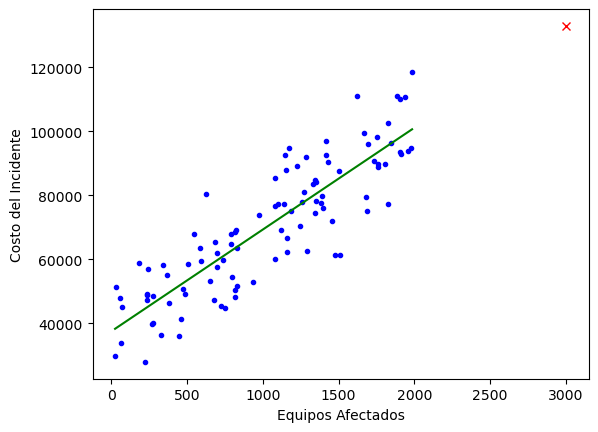

In [16]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, Costo,  "rx")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()